In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# Question 2
def reverse_string(input):
    output = ''
    for char in range(len(input)):
        output += input[-(char+1)]
    return output


reverse_string('How do you do?')

'?od uoy od woH'

In [250]:
# Question 1
def bayes(a, b_given_a, b_given_not_a):
    return (b_given_a * a / (a * b_given_a + (1 - a) * b_given_not_a))

In [251]:
## Question 3
##
## put the data into a dataframe
mlb = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')

## select only the values for 1995 forward
after_1995_values = mlb['yearID'] > 1994
after_1995_uncleaned = mlb.iloc[after_1995_values.values]

# deal with null values
# since there are only two columns with null values we will drop those
# I considered filling those values with 0s but this seems to be the better approach
after_1995 = after_1995_uncleaned.drop(['HBP', 'SF'], axis=1,)

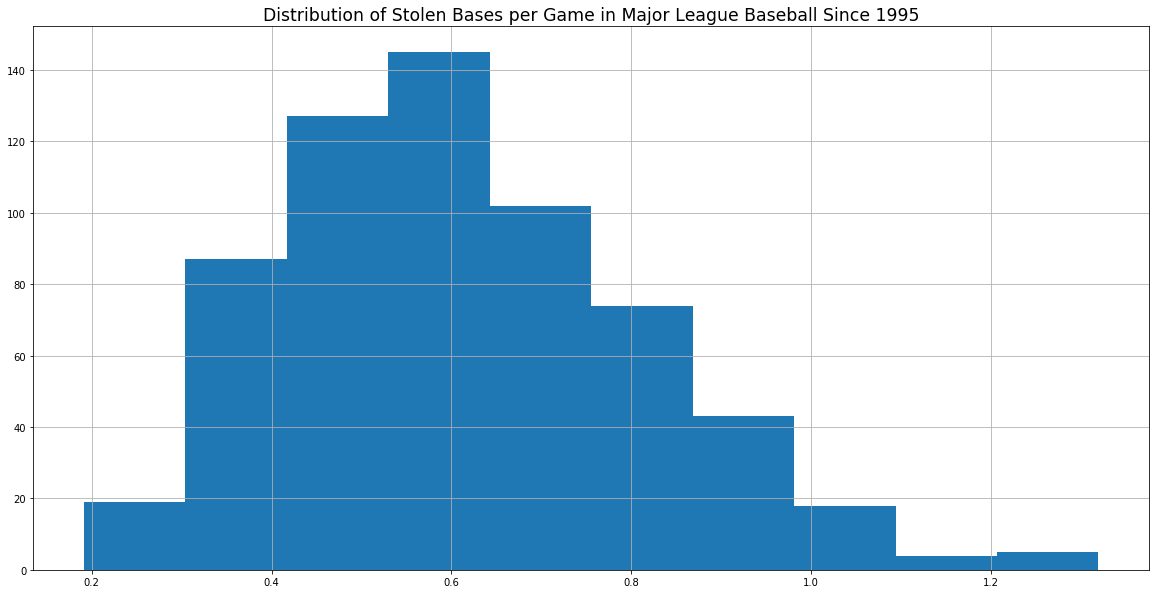

In [252]:
# Questoin 3.a.1

stolen_per_game = after_1995['SB'] / mlb['G']
plt.figure(figsize=(20, 10))
stolen_per_game.hist()
plt.title('Distribution of Stolen Bases per Game in Major League Baseball Since 1995', size='xx-large')
plt.show()

# This distribution appears to be Poisson. It calculate the frequency of an event (stolen base)
# in a given time period (a game).

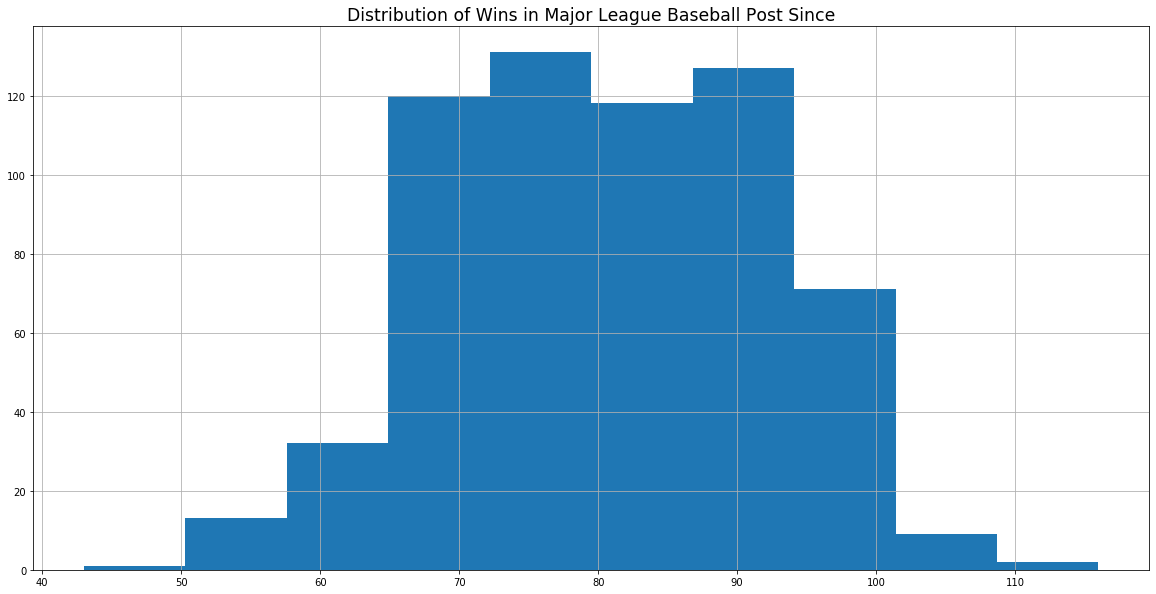

In [253]:
# Question 3.a.2
plt.figure(figsize=(20,10))
after_1995['W'].hist()
plt.title('Distribution of Wins in Major League Baseball Post Since', size='xx-large')
plt.show()

# This distribution is Binomial. It is a distribution of the frequency of one (a win) of 
# multiple (in this case two) possible outcomes over a series of trials (a season).

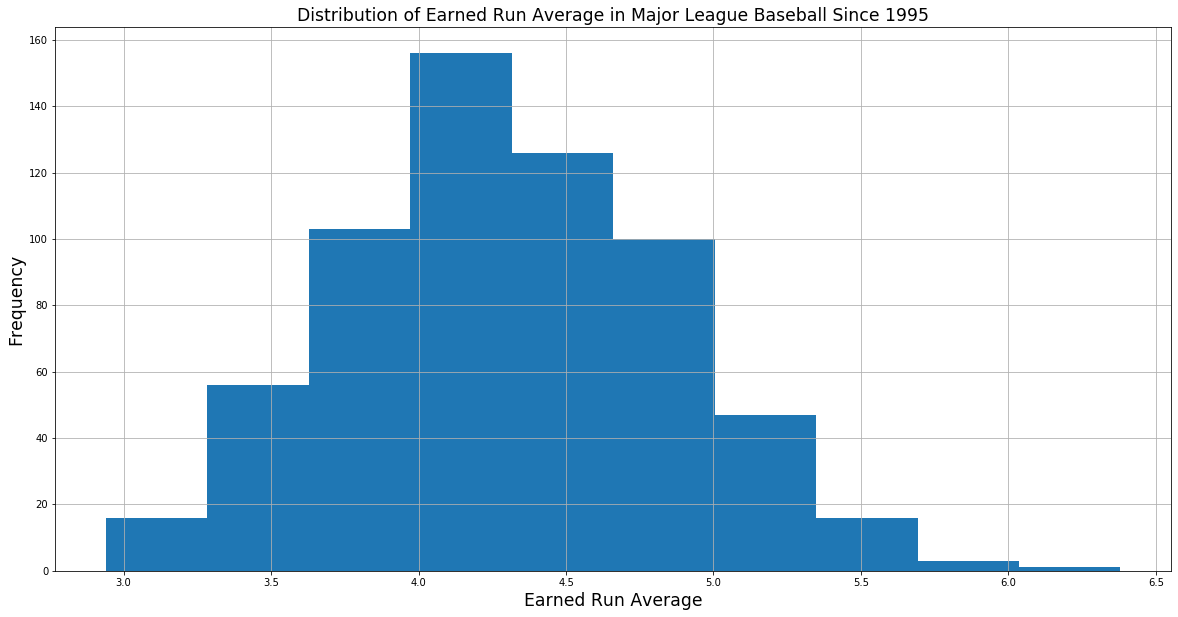

In [254]:
# Question 3.a.3
plt.figure(figsize=(20,10))
after_1995['ERA'].hist()
plt.title('Distribution of Earned Run Average in Major League Baseball Since 1995', size='xx-large')
plt.xlabel('Earned Run Average', size='xx-large')
plt.ylabel('Frequency', size='xx-large')
plt.show()

# This distribution appears to be roughly normal with a positive skew.
# It measures the mean of a variable (earned runs) in a large sample All MLB games since 1995. 
# This skew is likely caused by outliers.

In [255]:
# Question 3.b
# add a column for a teams win percentage
after_1995 = after_1995.assign(winpercentage = (after_1995.W / after_1995.G)*100)

# lets import the players data we worked with earlier.
players = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/players.csv')

# limit the data to the same time period
_1995_players_values = players['yearid'] > 1994
_1995_players = players.iloc[_1995_players_values.values]

#create a column for team salary with empty values
after_1995['teamsalary'] = 0

# calculate the total salaries for all players in a given year
for year in range (1995, 2016, 1):
    for team in after_1995['teamID'].values:
        team_rows = (_1995_players['teamid'] == team) & (_1995_players['yearid'] == year)
        team_salary = _1995_players.iloc[team_rows.values]
        after_1995.loc[(after_1995.teamID == team) & (after_1995.yearID == year), 'teamsalary'] = (team_salary['salary'].sum())


# I'll move showing the plots to new cells to avoid running this code over again

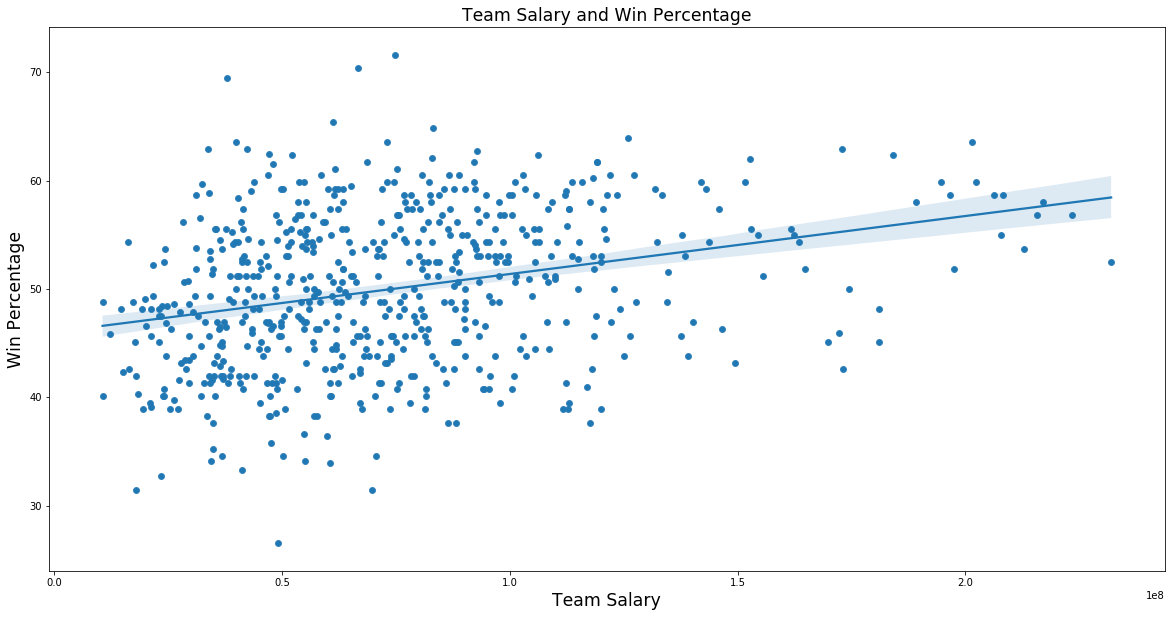

We see that team's salaries and their win percentages are only weakly correlated with a coefficent value of 0.2968528940075013


In [256]:
# Now that we know how much each team spends on players's saleries 
#we can see if that has relationships with other features of the data


#first let's look at how if affects how many games the a team wins
plt.figure(figsize=(20,10))
plt.title('Team Salary and Win Percentage', size='xx-large')
sns.scatterplot(x='teamsalary', y='winpercentage', data=after_1995)
sns.regplot(x='teamsalary', y='winpercentage', data=after_1995)
plt.xlabel('Team Salary', size='xx-large')
plt.ylabel('Win Percentage', size='xx-large')
plt.show()
print('We see that team\'s salaries and their win percentages are only weakly correlated with a coefficent value of {}'.format(after_1995['winpercentage'].corr(after_1995['teamsalary'])))

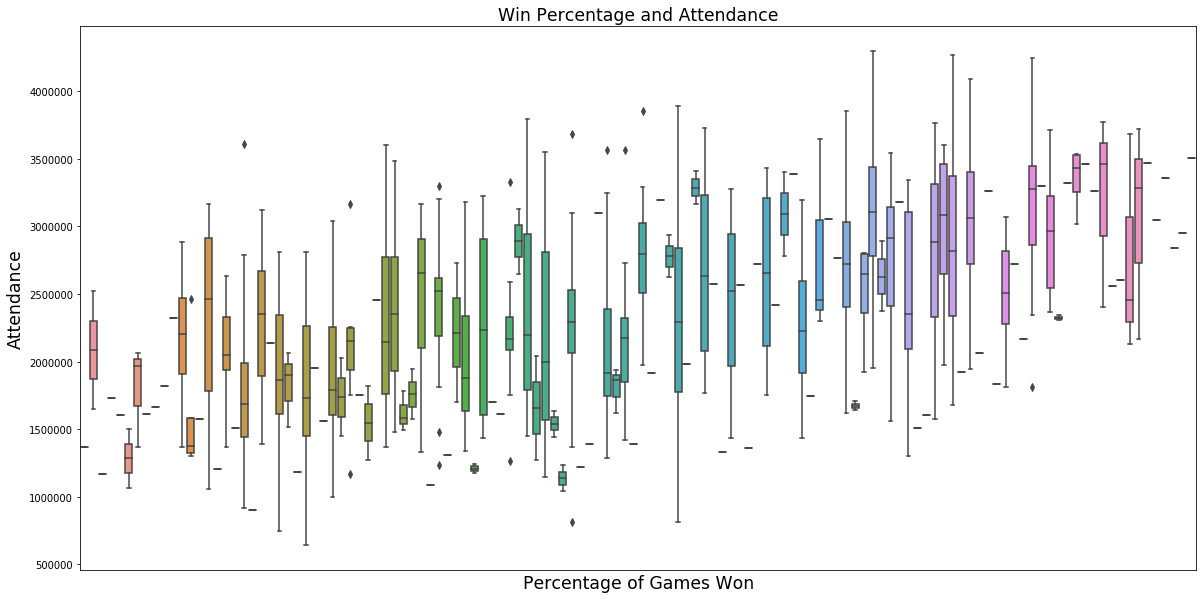

Here we see a correlation of win percentage and games at a coefficent value of 0.4770754279529778 this shows that there is a moddest positive relationship between winning games and fans coming to watch in the stands.


In [257]:
plt.figure(figsize=(20,10))
sns.boxplot(x='winpercentage', y='attendance', data=after_1995,)
#sns.regplot(x='winpercentage', y='attendance', data=after_1995)
plt.title('Win Percentage and Attendance', size='xx-large')
plt.xlabel('Percentage of Games Won', size='xx-large')
plt.xticks([])
plt.ylabel('Attendance', size='xx-large')
plt.show()


corr_value = after_1995['attendance'].corr(after_1995['winpercentage'])
print('Here we see a correlation of win percentage and games at a coefficent value of {} this shows that there is a moddest positive relationship between winning games and fans coming to watch in the stands.'.format(corr_value))

In [258]:
# what has the strongest correlation with winpercentage?
print('Runs unsprprisingly have the strongest correlation to wins. Walks are the next closest with home runs taking third. ERA is negatively associated with winning. Strikeouts have surprisingly negative small correlation.')
after_1995[['winpercentage', 'R', 'H', 'AB', 'BB', 'HR', 'SO', 'ERA', 'E', 'teamsalary']].corr()

Runs unsprprisingly have the strongest correlation to wins. Walks are the next closest with home runs taking third. ERA is negatively associated with winning. Strikeouts have surprisingly negative small correlation.


,winpercentage,R,H,AB,BB,HR,SO,ERA,E,teamsalary
winpercentage,1.000000,0.505161,0.327314,0.091386,0.408547,0.398644,-0.129209,-0.597271,-0.319676,0.296853
R,0.505161,1.000000,0.813432,0.437538,0.638620,0.712477,-0.308416,0.282065,0.039045,-0.004496
H,0.327314,0.813432,1.000000,0.692250,0.320036,0.420108,-0.389180,0.289163,0.015735,0.069125
AB,0.091386,0.437538,0.692250,1.000000,0.150299,0.294324,0.098278,0.113810,0.006696,0.197659
BB,0.408547,0.638620,0.320036,0.150299,1.000000,0.442561,-0.060306,0.080285,0.013267,-0.046239
HR,0.398644,0.712477,0.420108,0.294324,0.442561,1.000000,0.033058,0.184277,0.005001,0.101484
SO,-0.129209,-0.308416,-0.389180,0.098278,-0.060306,0.033058,1.000000,-0.209466,-0.023061,0.143888
ERA,-0.597271,0.282065,0.289163,0.113810,0.080285,0.184277,-0.209466,1.000000,0.331587,-0.344648
E,-0.319676,0.039045,0.015735,0.006696,0.013267,0.005001,-0.023061,0.331587,1.000000,-0.373014
teamsalary,0.296853,-0.004496,0.069125,0.197659,-0.046239,0.101484,0.143888,-0.344648,-0.373014,1.000000


Text(0.5, 1.0, 'Sample Means of Wins in Major League Baseball Since 1995')

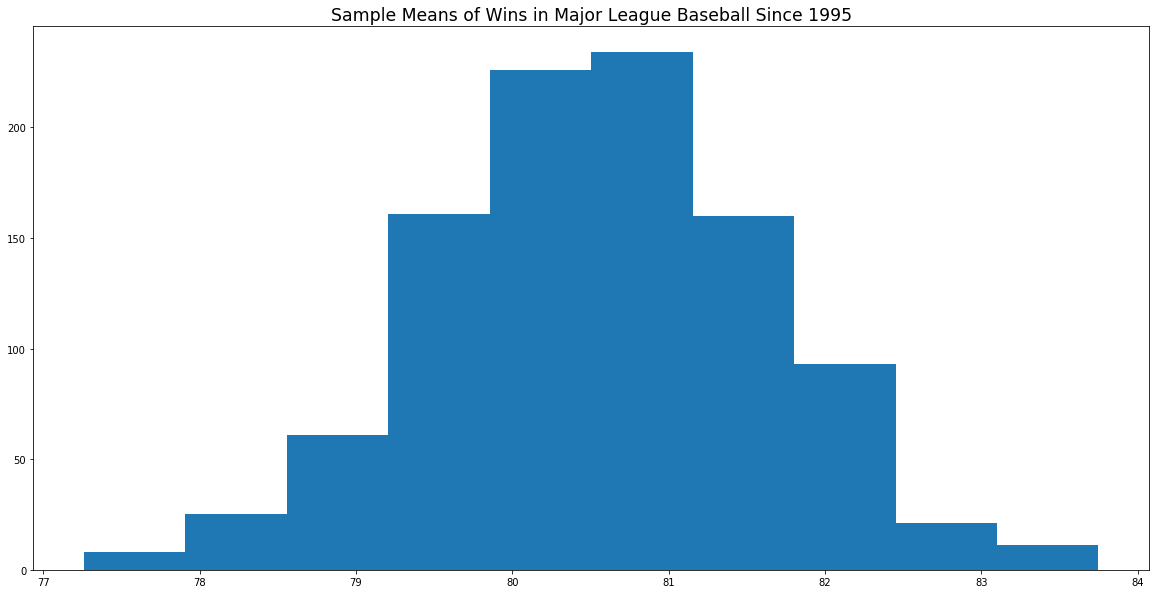

In [259]:
# Question 4.1
wins_means = []
for trail in range (1000):
    observations = after_1995['W'].sample(n=100)
    wins_means.append(observations.mean())

plt.figure(figsize=(20, 10))
plt.hist(wins_means)
plt.title('Sample Means of Wins in Major League Baseball Since 1995', size='xx-large')

Text(0.5, 1.0, 'Sample Means of Earned Run Average in Major League Baseball Since 1995')

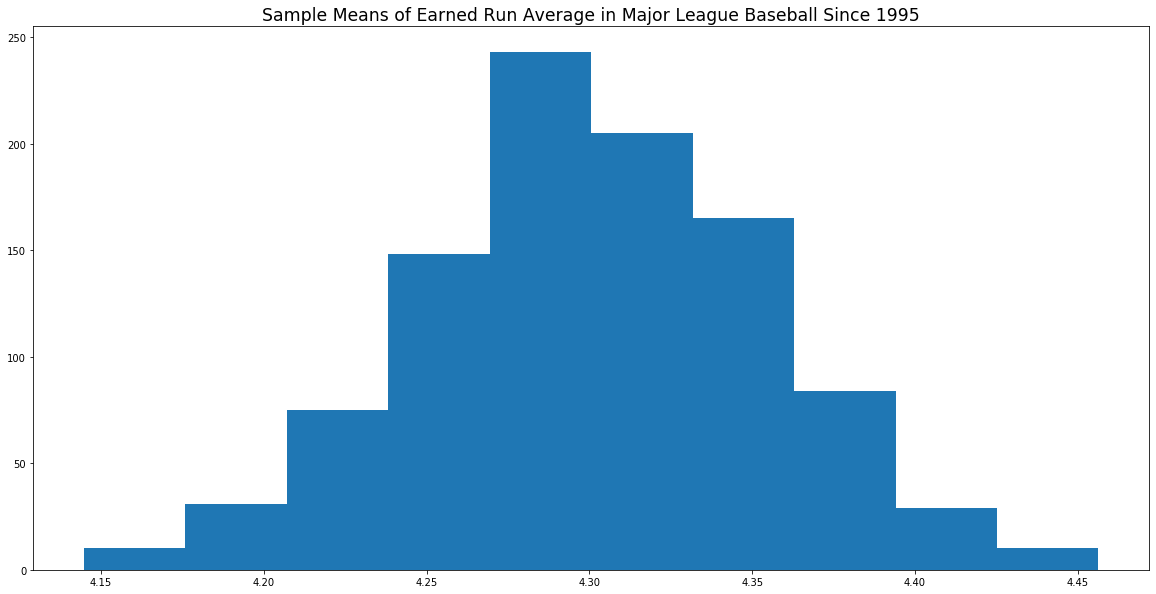

In [260]:
# Question 4.2
era_means = []
for trail in range (1000):
    observations = after_1995['ERA'].sample(n=100)
    era_means.append(observations.mean())

plt.figure(figsize=(20, 10))
plt.hist(era_means)
plt.title('Sample Means of Earned Run Average in Major League Baseball Since 1995', size='xx-large')

In [12]:
# Both of these distributions appear normal. Which is what we would expect given the central limit theory. 